<a href="https://colab.research.google.com/github/Samuelalejo18/12-de-julio/blob/main/Revisi%C3%B3n_de_literatura_Scopus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Revisión de literatura de Scopus

Para llevar a cabo la revisión se hará uso de la librería litstudy (https://pypi.org/project/litstudy/) de python, así como las librerías numpy, pandas y matplotlib.

En este ejercicio realizaremos una revisión de los datos con estadística exploratoria y descriptiva, así como la aplicación de algunas técnicas de NLP (Procesamiento de Lenguaje Natural).

Para los datos iniciales se hizo uso de las palabras claves "GPU" y "programming model".


## Paso 1: Instalar las librerías necesarias

In [40]:
!pip install litstudy

## Paso 2: Importar las librerías necesarias y realizar las configuraciones pertinentes

In [41]:
# Import other libraries
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbs

# Options for plots
plt.rcParams['figure.figsize'] = (10, 6)
sbs.set('paper')

# Import litstudy
path = os.path.abspath(os.path.join('..'))
if path not in sys.path:
    sys.path.append(path)

import litstudy

## Paso 3: Recolectar los datos de la búsqueda

In [50]:
docs_scopus = litstudy.load_scopus_csv('data/scopus.csv')

In [51]:
print(len(docs_scopus), 'documentos encontrados')

2000 documentos encontrados


## Paso 4: Filtramos los datos dependiendo del caso

Graficamos los documentos por años de publicación

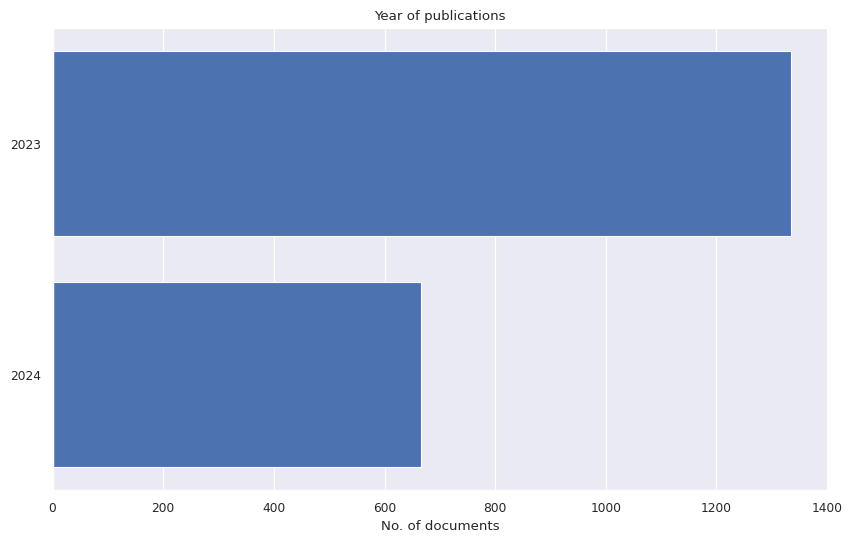

In [52]:
litstudy.plot_year_histogram(docs_scopus);

In [55]:
docs = docs_scopus.filter_docs(lambda d: d.publication_year >= 2006)
print(len(docs), 'documentos filtrados desde el 2006')

2000 documentos filtrados desde el 2006


### Estadísticas generales:

Para poder llevar a cabo esta revisión, podemos graficar distintos datos, a continuación se presentan algunos ejemplos que puede utilizar:

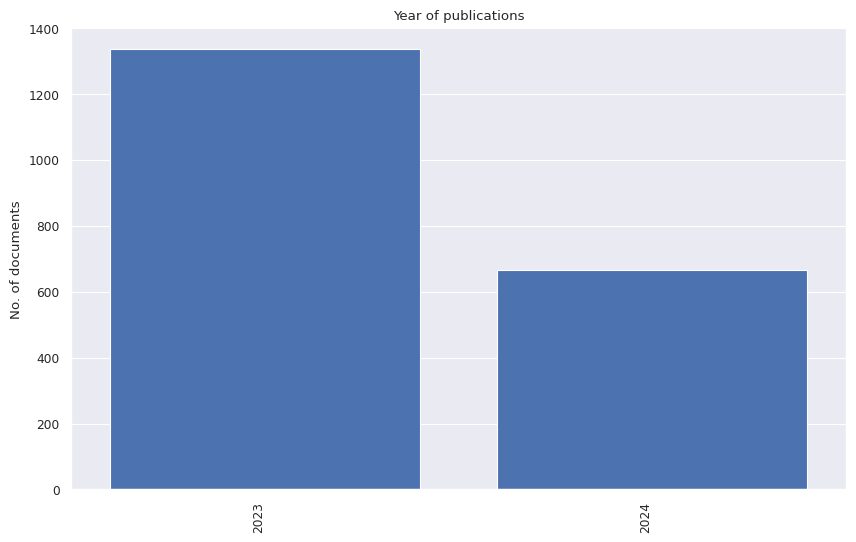

In [56]:
litstudy.plot_year_histogram(docs, vertical=True);

Graficamos la afiliación de los autores (La entidad a la cuál se encuentran afiliados al momento de realizar la investigación, normalmente corresponde a la universidad o entidad).

En la siguiente gráfica se presentan las 15 afiliaciones con la mayor cantidad de publicaciones.

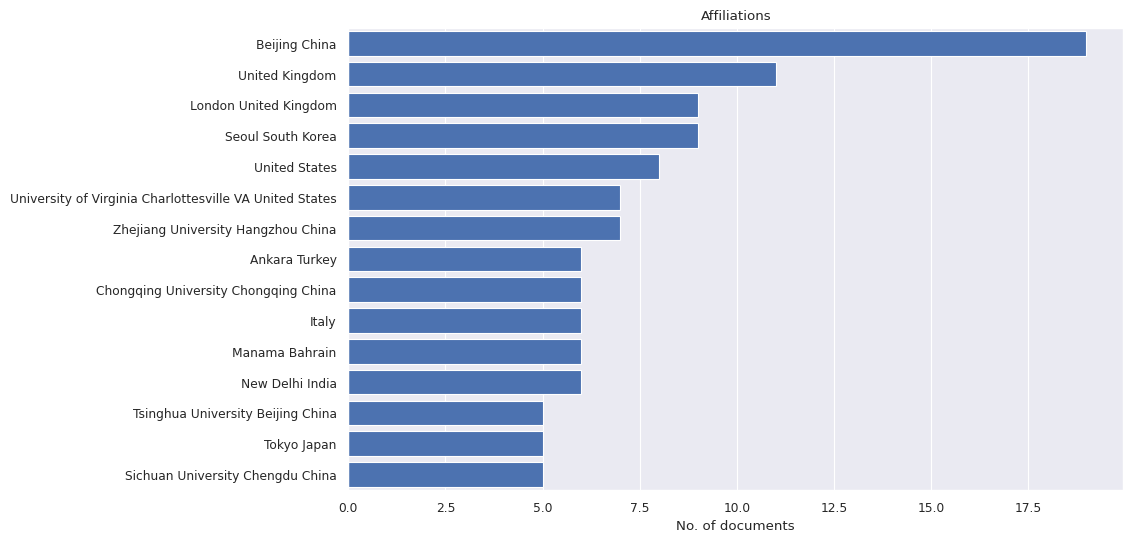

In [57]:
litstudy.plot_affiliation_histogram(docs, limit=15);

En la siguiente gráfica se presentan los autores que más han realizado publicaciones al respecto

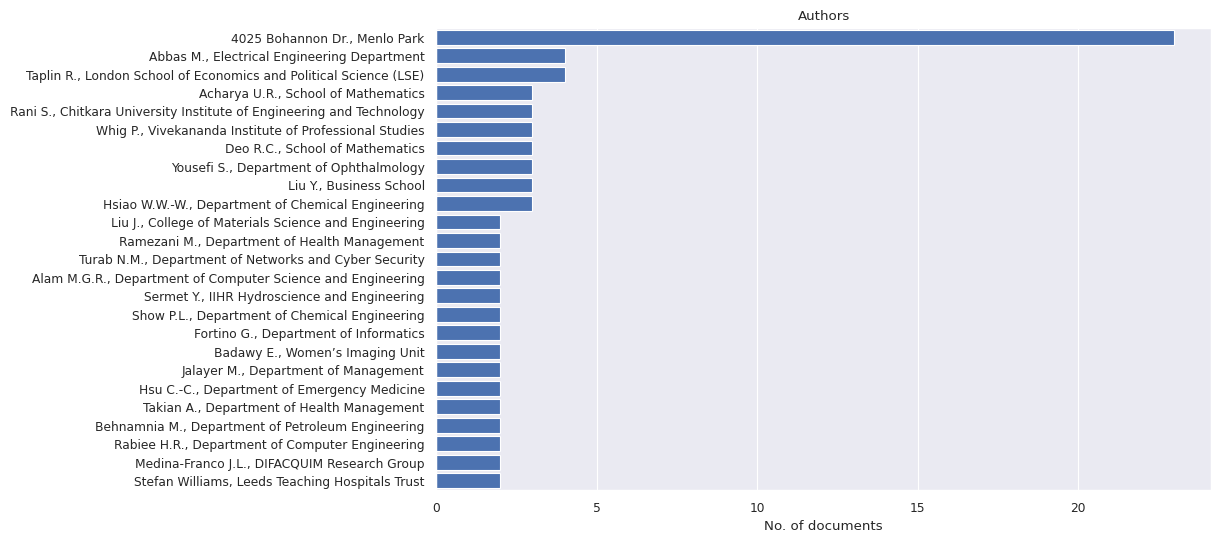

In [64]:
litstudy.plot_author_histogram(docs);


Los idiomas en los cuales más realizan publicaciones

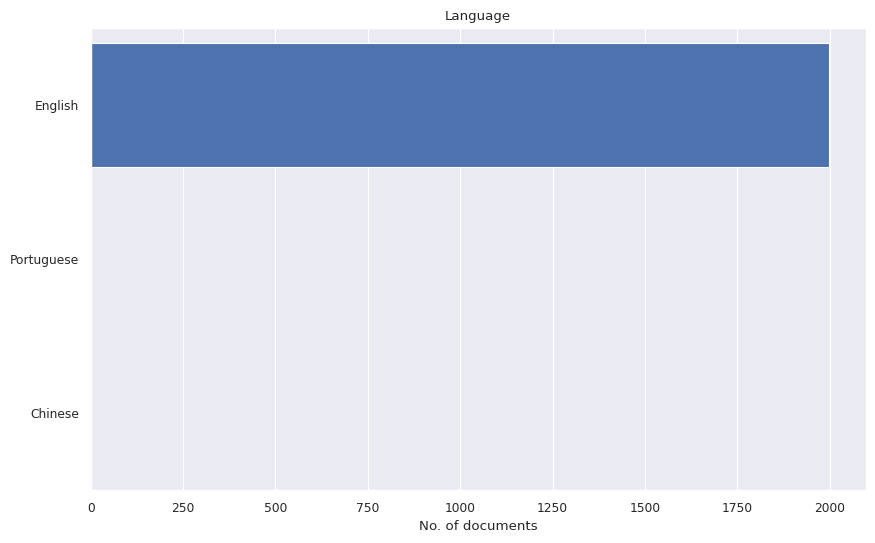

In [65]:
litstudy.plot_language_histogram(docs);


Se grafica el congreso o la revista donde se realizó la publicación

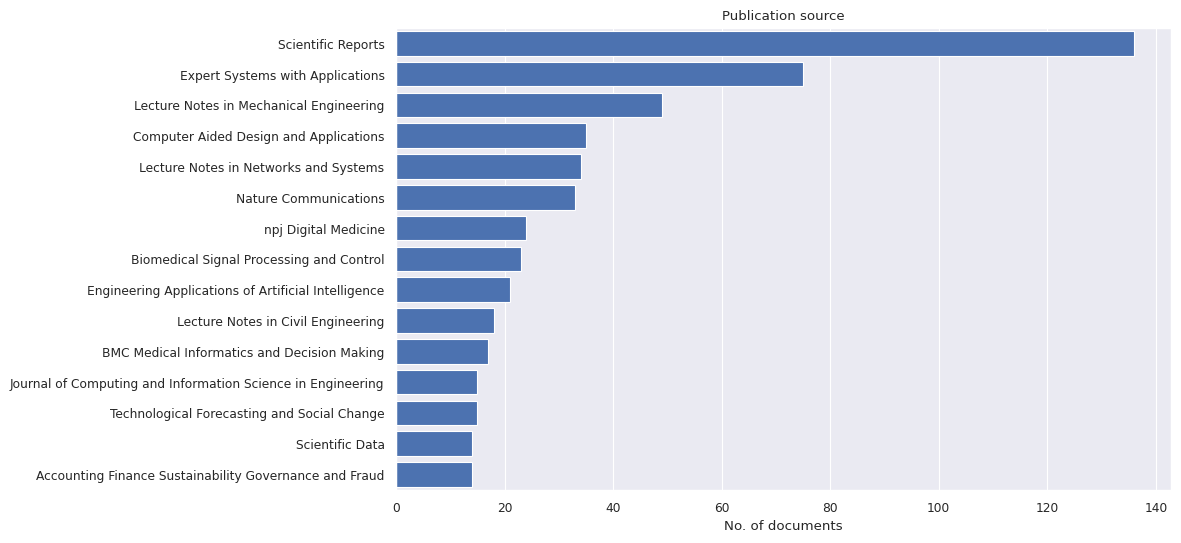

In [66]:
litstudy.plot_source_histogram(docs, limit=15);

El país de origen de la publicación

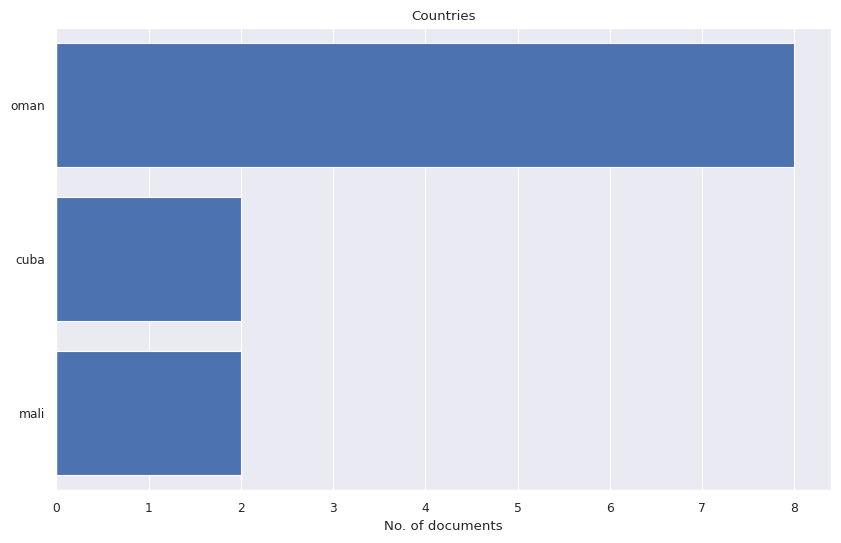

In [89]:
litstudy.plot_country_histogram(docs, limit=15);

Continente de origen de la publicación

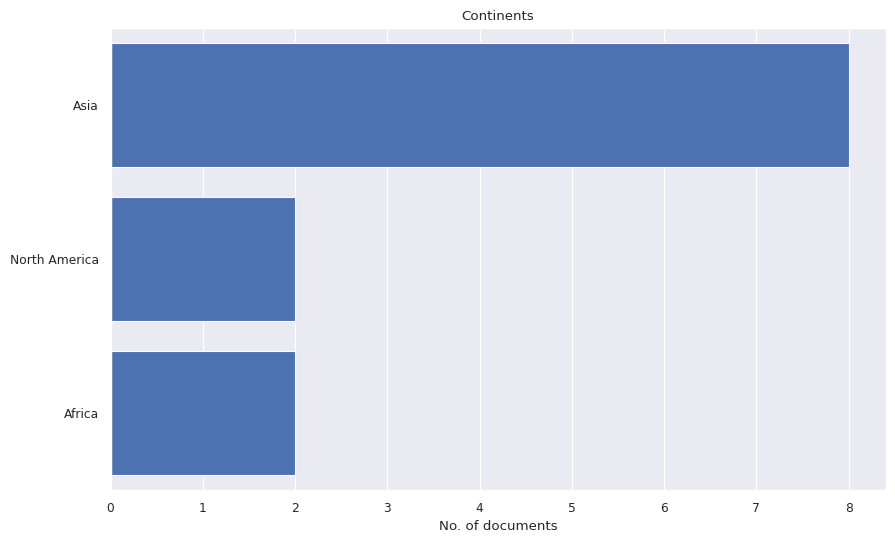

In [68]:
litstudy.plot_continent_histogram(docs);

## Paso 5: Modelamiento de temas

Creamos el Corpus (Conjunto de textos o datos para realizar la revisión).

In [70]:
corpus = litstudy.build_corpus(docs, ngram_threshold=0.8)

Presentamos la distribución de los temas

In [71]:
litstudy.compute_word_distribution(corpus).filter(like='_', axis=0).sort_index()

,count
american_academy,7
ant_colony,13
apple_academic,24
augmented_reality,12
author_exclusive,232
...,...
trial_registration,19
unmanned_aerial,5
wiley_periodicals,5
wind_turbines,5


Visualizamos la distribución:

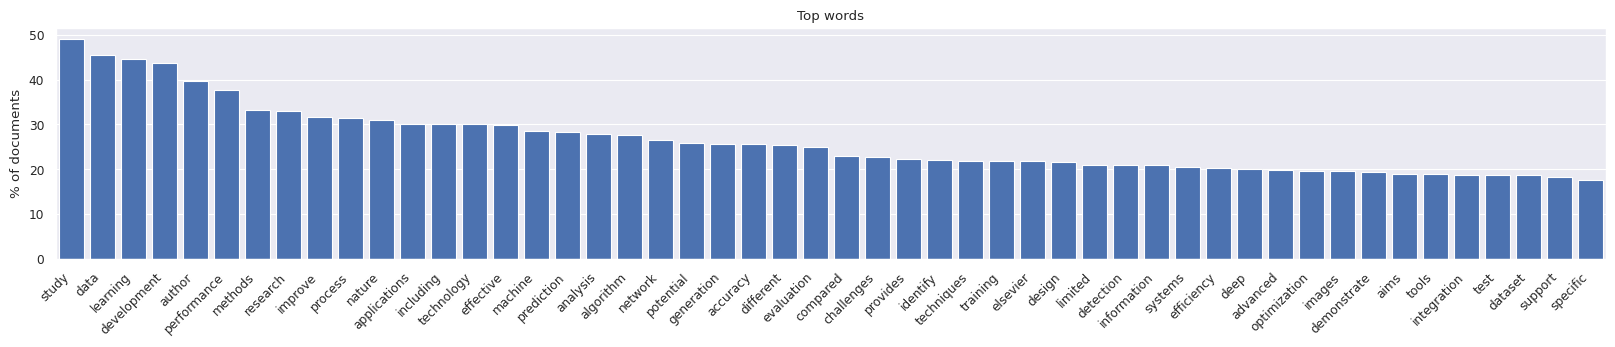

In [72]:
plt.figure(figsize=(20, 3))
litstudy.plot_word_distribution(corpus, limit=50, title="Top words", vertical=True, label_rotation=45);

A continuación, entrenamos un modelo de temas NMF. El modelado de temas es una técnica de procesamiento de lenguaje natural para descubrir "temas" abstractos en un conjunto de documentos. Necesitamos seleccionar manualmente el número de temas deseados. Aquí elegimos 15 temas. Se recomienda experimentar con más o menos temas para obtener temas más detallados o más generales.

In [73]:
num_topics = 15
topic_model = litstudy.train_nmf_model(corpus, num_topics, max_iter=250)

Para entender el resultado de la factorización de matrices no negativas (NMF), podemos imprimir las palabras principales para cada tema.

In [90]:
for i in range(num_topics):
    print(f'Topic {i+1}:', topic_model.best_tokens_for_topic(i))

Topic 1: ['cancer', 'patients', 'breast', 'clinical', 'care']
Topic 2: ['transportation', 'robot', 'graph', 'smart', 'traffic']
Topic 3: ['digital', 'industry', 'manufacturing', 'production', 'technology']
Topic 4: ['chatbot', 'customer', 'user', 'services', 'social']
Topic 5: ['attacks', 'security', 'iot', 'cloud', 'internet']
Topic 6: ['abstract', 'chatgpt', 'future', 'editor', 'writing']
Topic 7: ['energy', 'optimization', 'power', 'consumption', 'solar']
Topic 8: ['drug', 'genes', 'protein', 'discovery', 'structure']
Topic 9: ['detection', 'network', 'neural', 'cnn', 'neural_network']
Topic 10: ['education', 'students', 'chatgpt', 'ethical', 'medical']
Topic 11: ['prediction', 'water', 'concrete', 'ann', 'strength']
Topic 12: ['segmentation', 'devices', 'materials', 'sensors', 'brain']
Topic 13: ['images', 'cad', 'design', 'deep', 'art']
Topic 14: ['explainable', 'explanations', 'interpretation', 'xai', 'prediction']
Topic 15: ['disease', 'covid', 'healthcare', 'diagnosis', 'patien

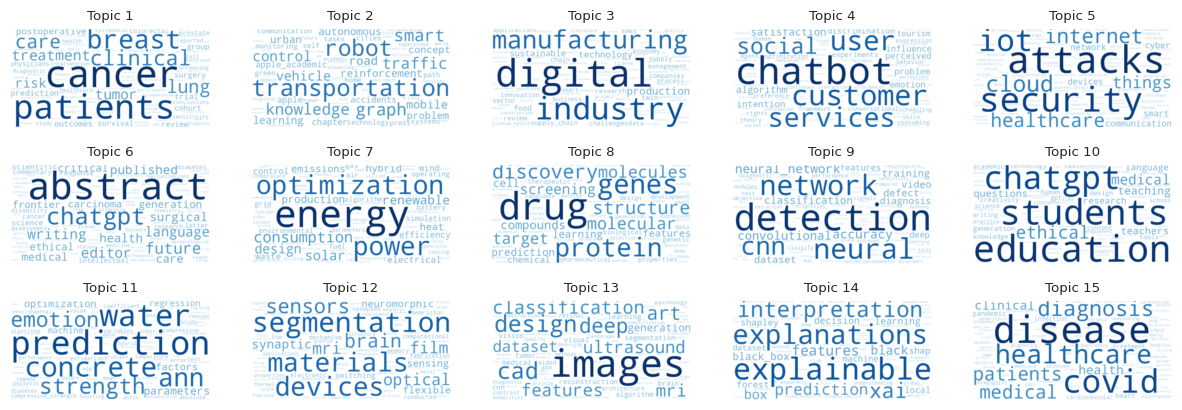

In [77]:
plt.figure(figsize=(15, 5))
litstudy.plot_topic_clouds(topic_model, ncols=5);

Estos 15 temas parecen prometedores.

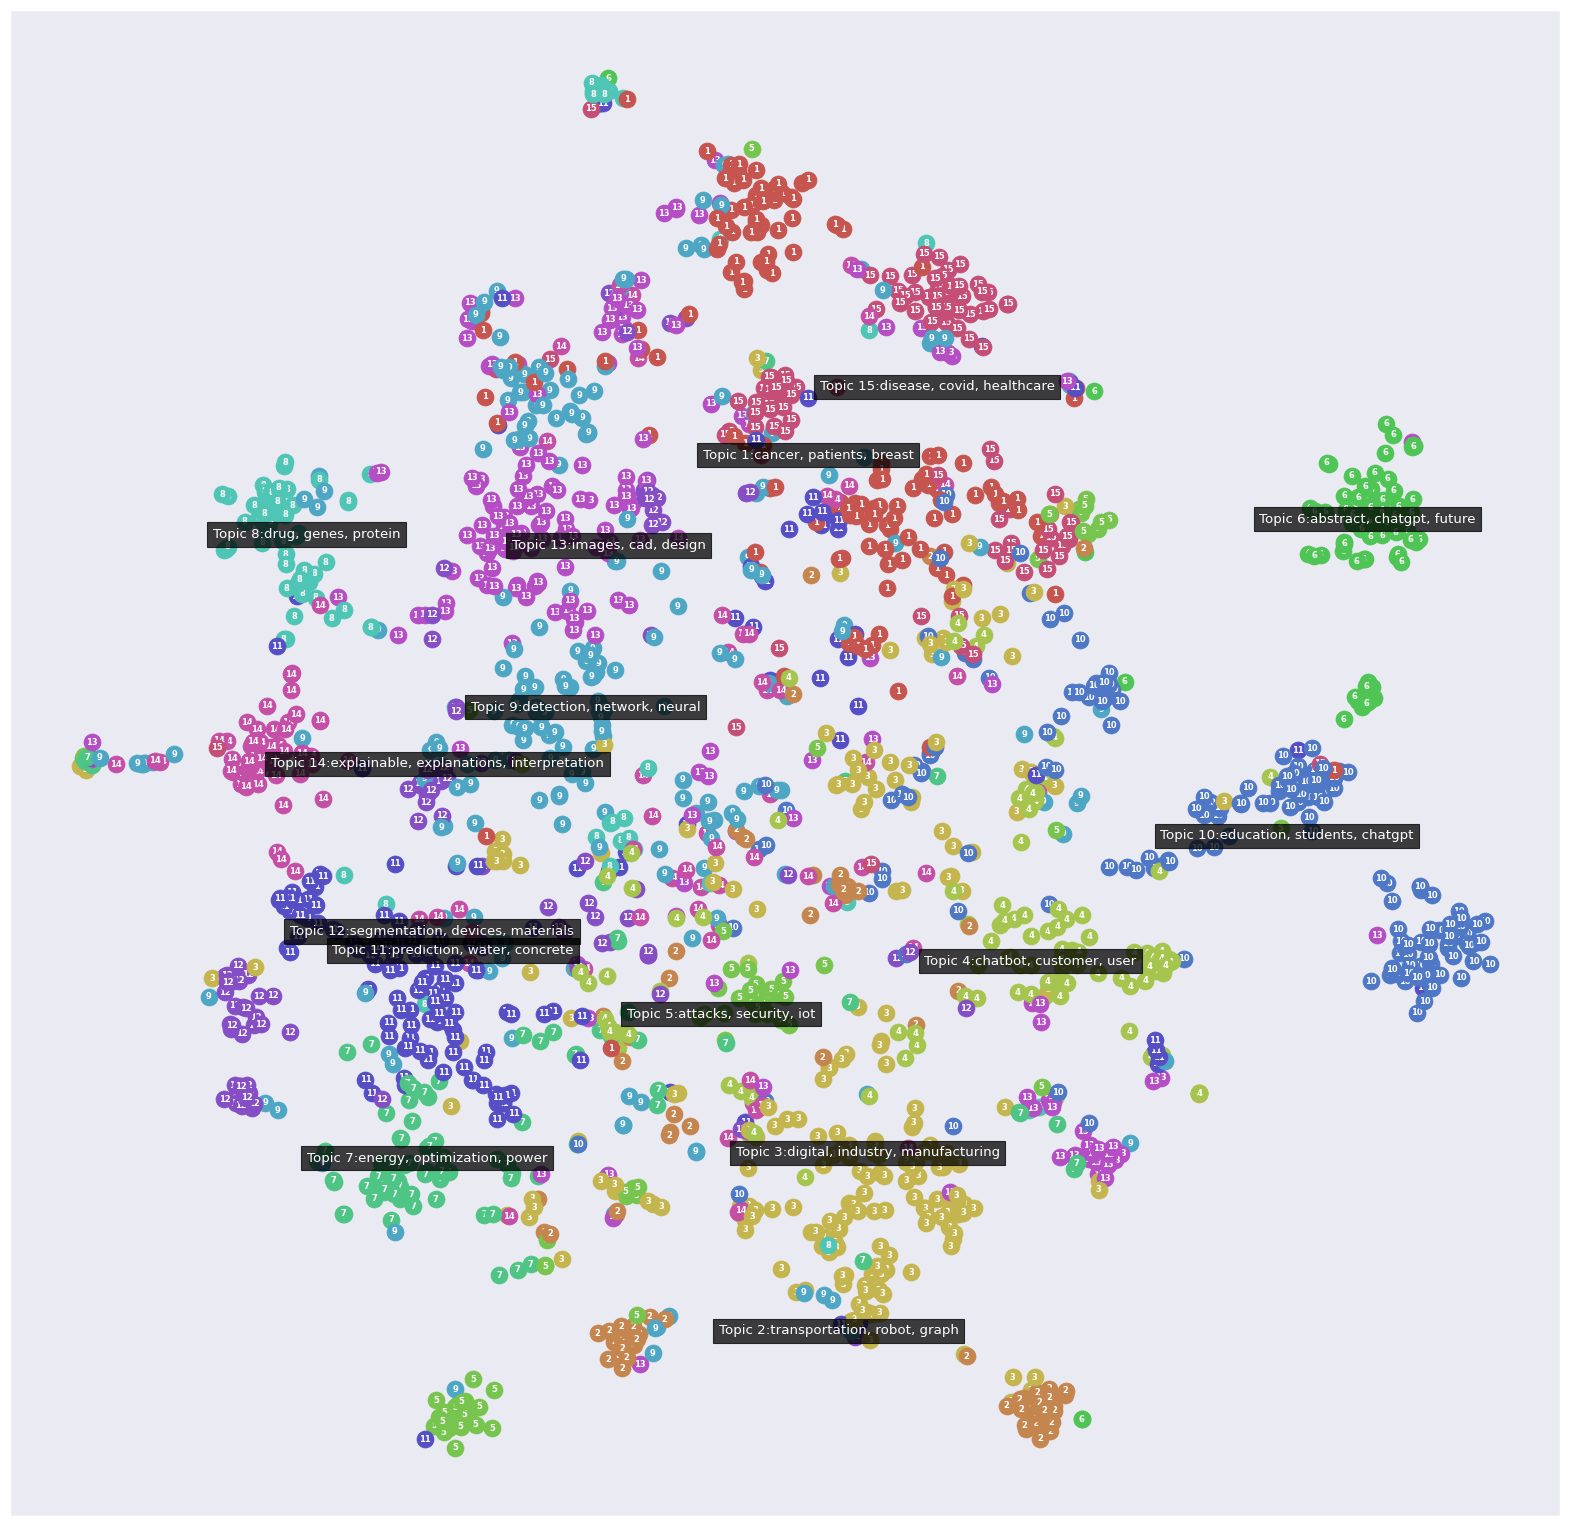

In [78]:
plt.figure(figsize=(20, 20))
litstudy.plot_embedding(corpus, topic_model);

## Paso 6: Modelamiento de temas avanzado

Podemos combinar los resultados del modelado de temas con la representación gráfica de estadísticas.

In [91]:
topic_id = topic_model.best_topic_for_token('algorithm')

Imprimimos los 10 principales documentos que pertenecen más fuertemente a este tema para revisar los resultados. Observamos que, de hecho, estos son documentos sobre el tema de aprendizaje profundo.

In [92]:
for doc_id in topic_model.best_documents_for_topic(topic_id, limit=10):
    print(docs[int(doc_id)].title)


Emotional expression by artificial intelligence chatbots to improve customer satisfaction: Underlying mechanism and boundary conditions
Can AI chatbots help retain customers? An integrative perspective using affordance theory and service-domain logic
Exploring the influence mechanism of chatbot-expressed humor on service satisfaction in online customer service
Can chatbot customer service match human service agents on customer satisfaction? An investigation in the role of trust
Shaping corporate character via chatbot social conversation: Impact on organization-public relational outcomes
Seeking empathy or suggesting a solution? Effects of chatbot messages on service failure recovery
Exploring the impacts of using the artificial intelligence voice-enabled chatbots on customers interactions in the United Arab Emirates
Adoption of AI Chatbots in Travel and Tourism Services
Service staff makes me nervous: Exploring the impact of insecure attachment on AI service preference
The impact of in

A continuación, anotamos el conjunto de documentos con una etiqueta "algorithm_topic" para aquellos documentos que pertenecen fuertemente a este tema (es decir, con un peso por encima de cierto umbral).

Después de esto, definimos dos grupos: documentos que tienen la etiqueta "dl_topic" y documentos que no tienen esta etiqueta. Ahora podemos, por ejemplo, imprimir las publicaciones a lo largo de los años para ver si el interés en el aprendizaje profundo ha aumentado o disminuido con el tiempo.

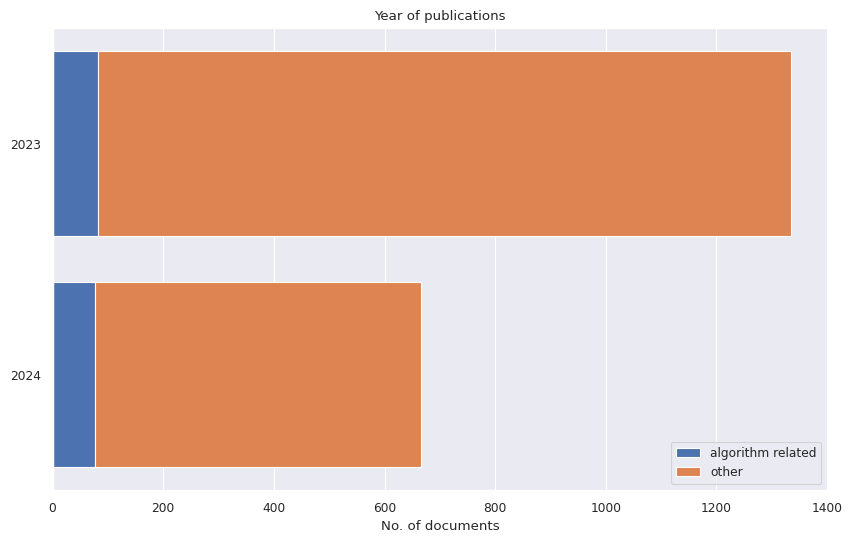

In [83]:
threshold = 0.2
dl_topic = topic_model.doc2topic[:, topic_id] > threshold

docs = docs.add_property('algorithm_topic', dl_topic)


groups = {
    'algorithm related': 'algorithm_topic',
    'other': 'not algorithm_topic',
}

litstudy.plot_year_histogram(docs, groups=groups, stacked=True);

El histograma muestra que el interés en el tema "algorithm" ha aumentado a lo largo de los años. Incluso podemos calcular la cantidad exacta al calcular el porcentaje de documentos sobre aprendizaje profundo cada año.

In [86]:
table = litstudy.compute_year_histogram(docs, groups=groups)
table.div(table.sum(axis=1), axis=0) * 100

,algorithm related,other
2023,6.146927,93.853073
2024,11.561562,88.438438


Alternativamente, podemos representar gráficamente los dos grupos para la fuente de las publicaciones.

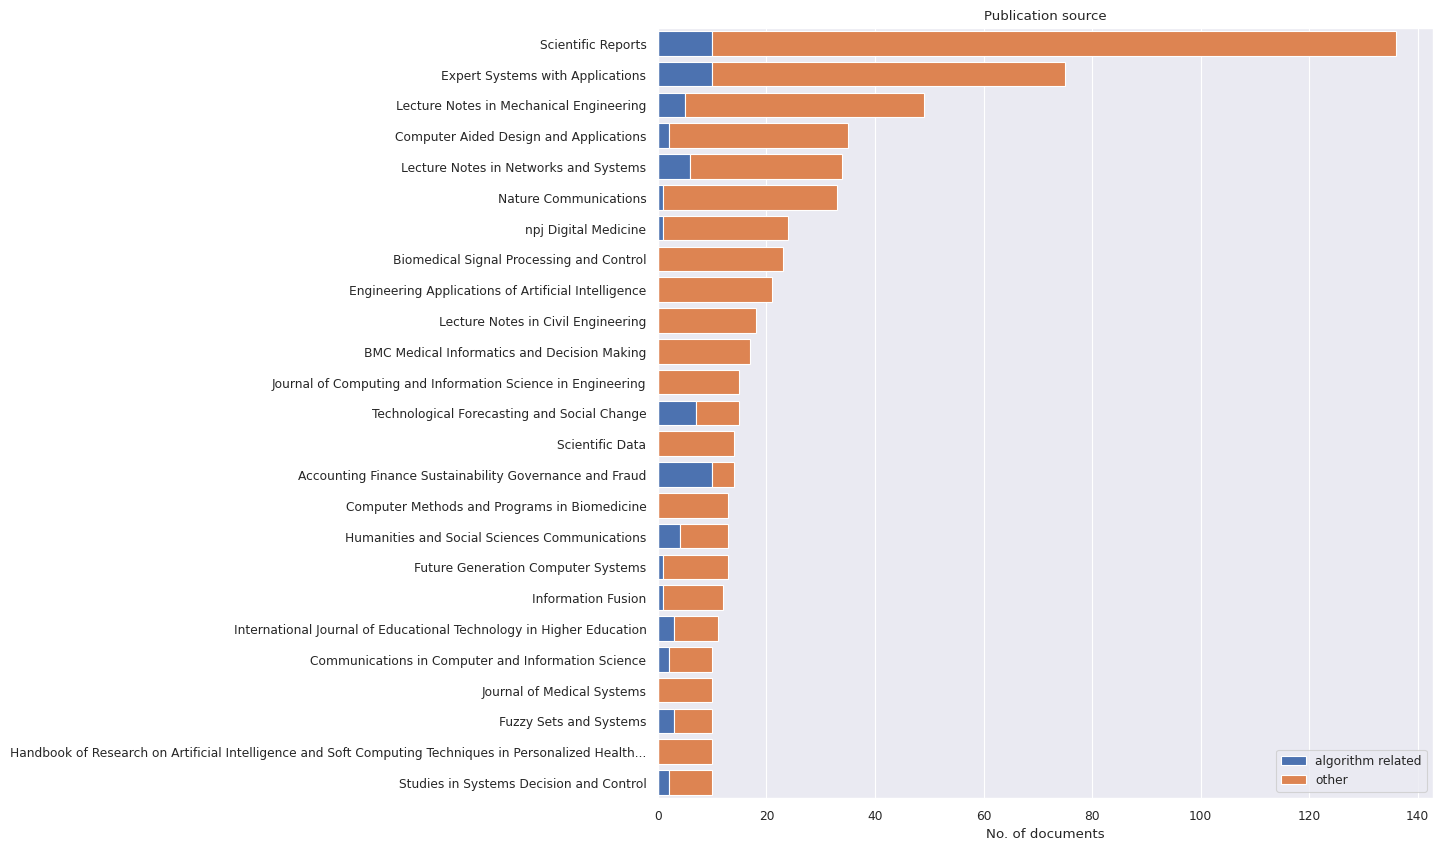

In [93]:
plt.figure(figsize=(10, 10))
litstudy.plot_source_histogram(docs, groups=groups, limit=25, stacked=True);

In [94]:
# Compute histogram by publication venue
table = litstudy.compute_source_histogram(docs, groups=groups)

# Add column 'total'
table['total'] = table['algorithm related'] + table['other']

# Remove rare venues that have less than 5 publications
table = table[table['total'] >= 5]

# Add column 'ratio'
table['ratio'] = table['algorithm related'] / table['total'] * 100

# Sort by ratio in descending order
table.sort_values(by='ratio', ascending=False)

,algorithm related,other,total,ratio
Journal of Retailing and Consumer Services,9,0,9,100.000000
Accounting Finance Sustainability Governance and Fraud,10,4,14,71.428571
International Journal of Human Computer Studies,3,2,5,60.000000
European Journal of Operational Research,3,3,6,50.000000
Technological Forecasting and Social Change,7,8,15,46.666667
...,...,...,...,...
Journal of Autonomous Intelligence,0,6,6,0.000000
BMC Medical Imaging,0,6,6,0.000000
Environmental Footprints and Eco Design of Products and Processes,0,6,6,0.000000
Mechanical Systems and Signal Processing,0,6,6,0.000000
